In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from PIL import Image, ImageFile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
# Preventing errors with truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Function to remove corrupted images
def removeCorruptedImages(path):
    for filename in os.listdir(path):
        try:
            img = Image.open(os.path.join(path,filename))
            img.verify()
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)
            os.remove(os.path.join(path,filename))

In [28]:
# Setting up directories
basedir = "D:\\EE604 project\\Ass2\\NewR22"

traindir = os.path.join(basedir, 'train')
validdir = os.path.join(basedir, 'test')

# Removing corrupted images
classes = ['Defective', 'Normal']
for cls in classes:
    removeCorruptedImages(os.path.join(traindir, cls))
    removeCorruptedImages(os.path.join(validdir, cls))

In [29]:
# Preparing Data Generators
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

bx = 16

train_generator = train_datagen.flow_from_directory(
    traindir,
    target_size=(300, 300),
    batch_size=bx,
    class_mode='binary'  # Use binary mode for binary classification
)

valid_generator = test_datagen.flow_from_directory(
    validdir,
    target_size=(300, 300),
    batch_size=bx,
    class_mode='binary'  # Use binary mode for binary classification
)


Found 444 images belonging to 2 classes.
Found 111 images belonging to 2 classes.


In [40]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import Xception
import tensorflow as tf

# Building the base model
base_model = Xception(
    weights=r'D:\EE604 project\Ass2\weights_pretrained.h5',
    include_top=False,
    input_shape=(300, 300, 3)
)

# Adding custom layers for binary classification
model = Sequential([
    Flatten(input_shape=base_model.output_shape[1:]),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # One unit for binary classification
])

# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=model(base_model.output))

# Compiling the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True),
    loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.2),
    metrics=['accuracy']
)

model.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_11[0][0]']            
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]'

In [41]:
history2 = model.fit(
    train_generator,
    epochs=12,
    validation_data=valid_generator
)


Epoch 1/12
28/28 [==============================] - 119s 4s/step - loss: 0.6329 - accuracy: 0.6757 - val_loss: 0.6352 - val_accuracy: 0.6396
Epoch 2/12
28/28 [==============================] - 110s 4s/step - loss: 0.4772 - accuracy: 0.8626 - val_loss: 0.5416 - val_accuracy: 0.7658
Epoch 3/12
28/28 [==============================] - 112s 4s/step - loss: 0.4334 - accuracy: 0.9189 - val_loss: 0.4601 - val_accuracy: 0.8829
Epoch 4/12
28/28 [==============================] - 9045s 335s/step - loss: 0.4259 - accuracy: 0.9212 - val_loss: 0.4566 - val_accuracy: 0.9009
Epoch 5/12
28/28 [==============================] - 115s 4s/step - loss: 0.4020 - accuracy: 0.9437 - val_loss: 0.4362 - val_accuracy: 0.9369
Epoch 6/12
28/28 [==============================] - 2199s 81s/step - loss: 0.4170 - accuracy: 0.9437 - val_loss: 0.4595 - val_accuracy: 0.8829
Epoch 7/12
28/28 [==============================] - 117s 4s/step - loss: 0.3881 - accuracy: 0.9707 - val_loss: 0.4279 - val_accuracy: 0.9369
Epoch 8/

In [42]:
# Evaluating the model
val_loss, val_accuracy = model.evaluate(valid_generator)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

7/7 [==============================] - 6s 806ms/step - loss: 0.4126 - accuracy: 0.9369
Validation loss: 0.412554532289505
Validation accuracy: 0.9369369149208069


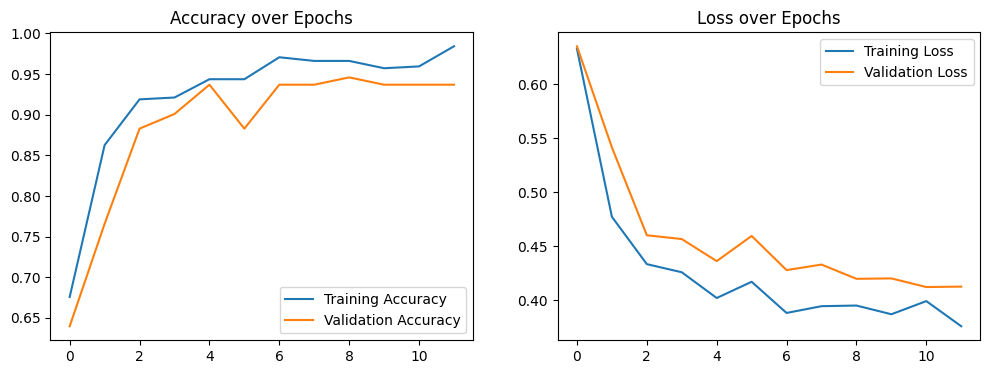

In [44]:
# Visualizing training results
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label = 'Training Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label = 'Training Loss')
plt.plot(history2.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

In [46]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# Saving the model
model.save("D:\EE604 project\Ass2\code\Model saved")

INFO:tensorflow:Assets written to: D:\EE604 project\Ass2\code\Model saved\assets


INFO:tensorflow:Assets written to: D:\EE604 project\Ass2\code\Model saved\assets


Testing on real images and displaying the output


Test1:Correct classified

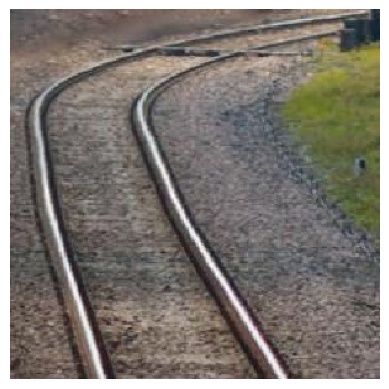

1/1 [==============================] - 0s 119ms/step
[[0.9426909]]
The image is classified as: Normal


In [76]:
img_path = "D:\\EE604 project\\Ass2\\NewR22\\train\\Normal\\17.jpg"  # Replace with the actual path

# Load and display the image
img = image.load_img(img_path, target_size=(300, 300))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)      # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0            # Normalize the image (if model trained with normalization)

# Pass the image to the model for prediction
prediction = model.predict(img_array)
print(prediction)
# Display the output
if prediction[0] > 0.5:
    print("The image is classified as: Normal")
else:
    print("The image is classified as: Defective")

Test 2:Correct Classified

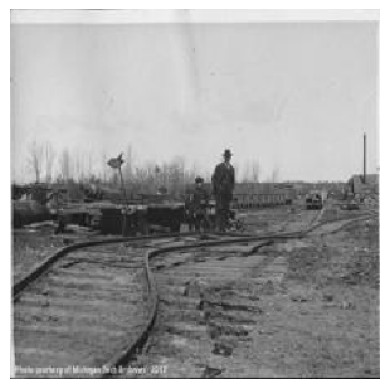

1/1 [==============================] - 0s 136ms/step
[[0.1225931]]
The image is classified as: Defective


In [78]:
img_path = "D:\\EE604 project\\Ass2\\NewR22\\test\\Defective\\275.jpg"  # Replace with the actual path

# Load and display the image
img = image.load_img(img_path, target_size=(300, 300))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)      # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0            # Normalize the image (if model trained with normalization)

# Pass the image to the model for prediction
prediction = model.predict(img_array)
print(prediction)
# Display the output
if prediction[0] > 0.5:
    print("The image is classified as: Normal")
else:
    print("The image is classified as: Defective")

Test 3:Wrong claasified

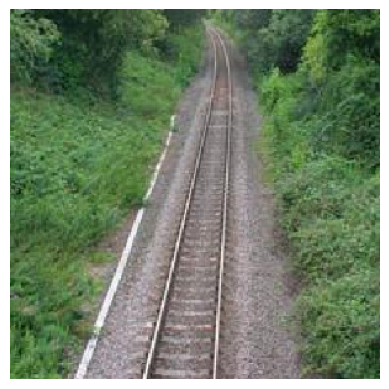

1/1 [==============================] - 0s 115ms/step
[[0.38798594]]
The image is classified as: Defective


In [79]:
img_path = "D:\\EE604 project\\Ass2\\NewR22\\test\\Normal\\266.jpg"  # Replace with the actual path

# Load and display the image
img = image.load_img(img_path, target_size=(300, 300))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)      # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0            # Normalize the image (if model trained with normalization)

# Pass the image to the model for prediction
prediction = model.predict(img_array)
print(prediction)
# Display the output
if prediction[0] > 0.5:
    print("The image is classified as: Normal")
else:
    print("The image is classified as: Defective")

Test4: Correct classified

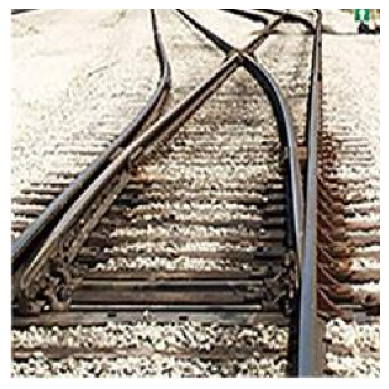

1/1 [==============================] - 0s 140ms/step
[[0.51646686]]
The image is classified as: Normal


In [80]:
img_path = "D:\\EE604 project\\Ass2\\NewR22\\test\\Normal\\276.jpg"  # Replace with the actual path

# Load and display the image
img = image.load_img(img_path, target_size=(300, 300))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)      # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0            # Normalize the image (if model trained with normalization)

# Pass the image to the model for prediction
prediction = model.predict(img_array)
print(prediction)
# Display the output
if prediction[0] > 0.5:
    print("The image is classified as: Normal")
else:
    print("The image is classified as: Defective")

Test5:Correct Classified

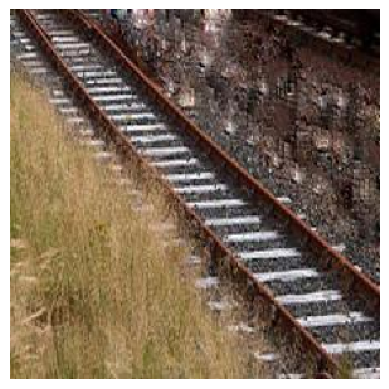

1/1 [==============================] - 0s 124ms/step
[[0.770788]]
The image is classified as: Normal


In [81]:
img_path = "D:\\EE604 project\\Ass2\\NewR22\\test\\Normal\\277.jpg"  # Replace with the actual path

# Load and display the image
img = image.load_img(img_path, target_size=(300, 300))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)      # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0            # Normalize the image (if model trained with normalization)

# Pass the image to the model for prediction
prediction = model.predict(img_array)
print(prediction)
# Display the output
if prediction[0] > 0.5:
    print("The image is classified as: Normal")
else:
    print("The image is classified as: Defective")

Test 6: Correct Classified

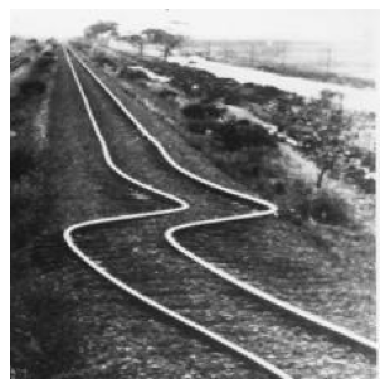

1/1 [==============================] - 0s 116ms/step
[[0.28586048]]
The image is classified as: Defective


In [82]:
img_path = "D:\\EE604 project\\Ass2\\NewR22\\test\\Defective\\302.jpg"  # Replace with the actual path

# Load and display the image
img = image.load_img(img_path, target_size=(300, 300))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)      # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0            # Normalize the image (if model trained with normalization)

# Pass the image to the model for prediction
prediction = model.predict(img_array)
print(prediction)
# Display the output
if prediction[0] > 0.5:
    print("The image is classified as: Normal")
else:
    print("The image is classified as: Defective")

Test 7: Correct Classified

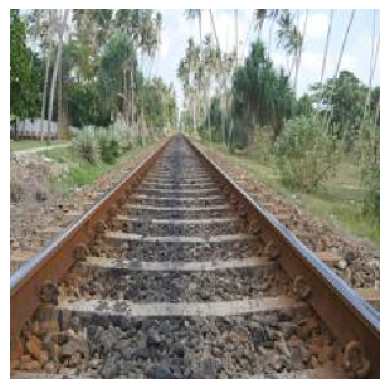

1/1 [==============================] - 0s 108ms/step
[[0.7415983]]
The image is classified as: Normal


In [83]:
img_path = "D:\\EE604 project\\Ass2\\NewR22\\test\\Normal\\281.jpg"  # Replace with the actual path

# Load and display the image
img = image.load_img(img_path, target_size=(300, 300))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)      # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0            # Normalize the image (if model trained with normalization)

# Pass the image to the model for prediction
prediction = model.predict(img_array)
print(prediction)
# Display the output
if prediction[0] > 0.5:
    print("The image is classified as: Normal")
else:
    print("The image is classified as: Defective")